In [2]:
from Codigo import *
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
import seaborn as sn
from statsmodels.tsa.arima.model import ARIMA
sn.set(style="whitegrid")


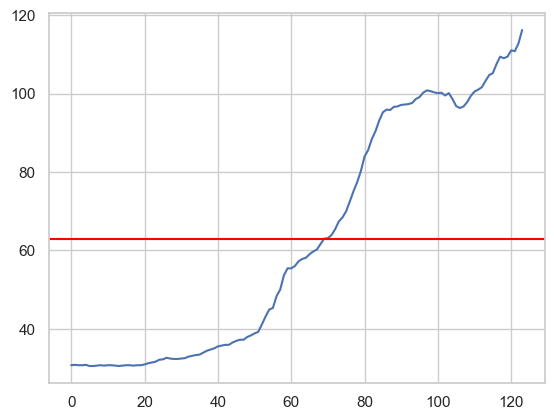

In [3]:
wpi = readdta('wpi1 (stata 15).dta')
plt.plot(wpi['wpi'])
plt.axhline(y = wpi['wpi'].mean(), c = 'red')
plt.show()

Estadístico ADF: -3.6289966257114186
Valor p: 0.005230267642936161
Rechazamos la hipótesis nula; la serie es estacionaria.


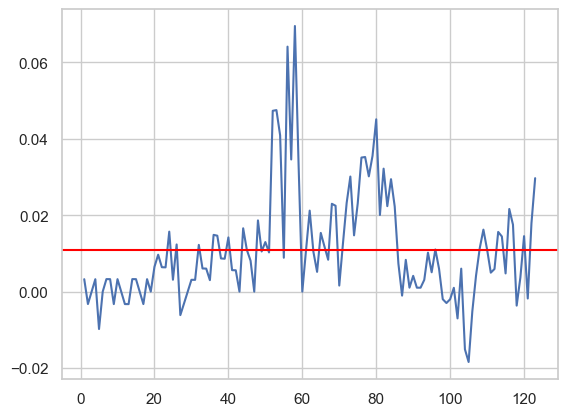

In [4]:
variable = wpi['ln_wpi'].diff().dropna()
DFuller(variable,1)

plt.plot(variable)
plt.axhline(y = variable.mean(), c = 'red')
plt.show()

In [5]:
orden = Pruebatoolkit(variable,4, p_value = 0.05)

Mejor orden encontrado: (1, 0, 1) con AIC: -756.7975599740333


In [6]:
orden = Pruebatoolkit(variable,4, trend = [0], p_value = 0.05)

Mejor orden encontrado: (1, 0, 1) con AIC: -755.1784186158316


In [7]:
from statsmodels.tsa.arima.model import ARIMA
resultado = ARIMA(variable, order = (1,0,1)).fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                 ln_wpi   No. Observations:                  123
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 382.399
Date:                Sun, 10 Dec 2023   AIC                           -756.798
Time:                        23:09:00   BIC                           -745.549
Sample:                             0   HQIC                          -752.228
                                - 123                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.005      2.020      0.043       0.000       0.021
ar.L1          0.8748      0.044     19.926      0.000       0.789       0.961
ma.L1         -0.4519      0.092     -4.908      0.0

C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


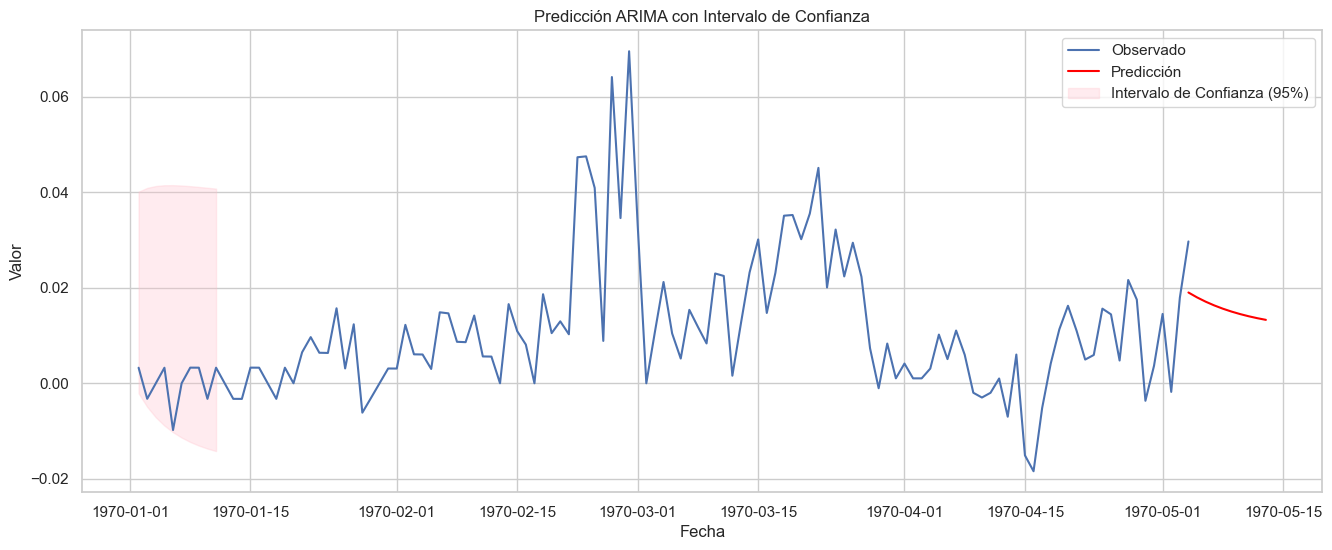

In [42]:
forecast = resultado.get_forecast(steps=10, alpha=0.05)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()
forecast_index = pd.date_range(start=variable.index[-1], periods=11, freq='D')[1:]
forecast_df = pd.DataFrame({'forecast': forecast_values, 'lower': conf_int.iloc[:, 0], 'upper': conf_int.iloc[:, 1]}, index=forecast_index)

# Graficar la serie temporal original
plt.figure(figsize=(16,6))
plt.plot(variable, label='Observado')

# Graficar la predicción
plt.plot(forecast_values, color='red', label='Predicción')

# Rellenar la zona de confianza del 95%
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confianza (95%)')

# Configuraciones adicionales para la visualización
plt.title('Predicción ARIMA con Intervalo de Confianza')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()